In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np
import random

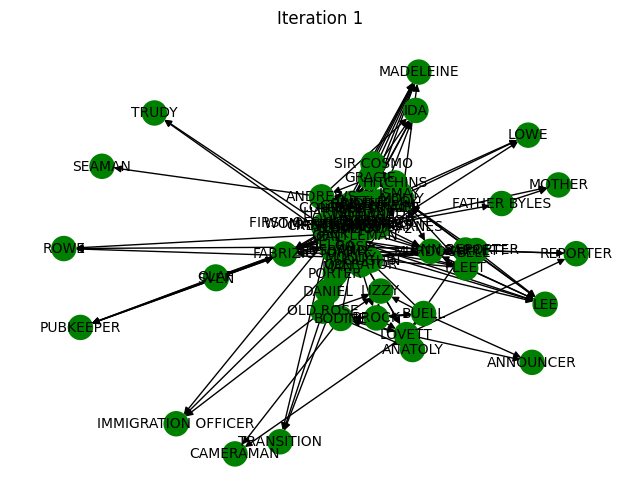

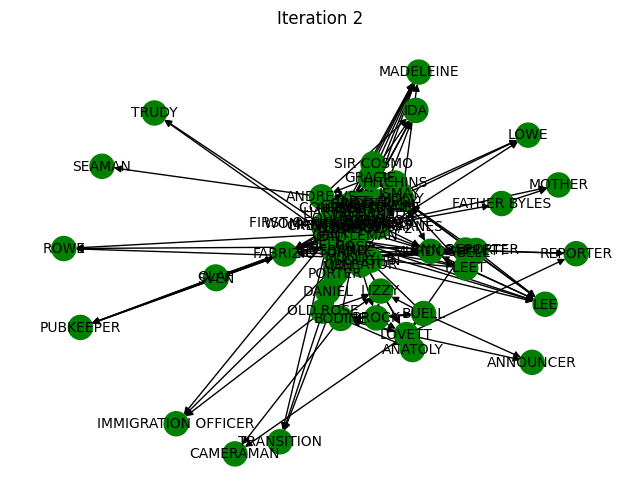

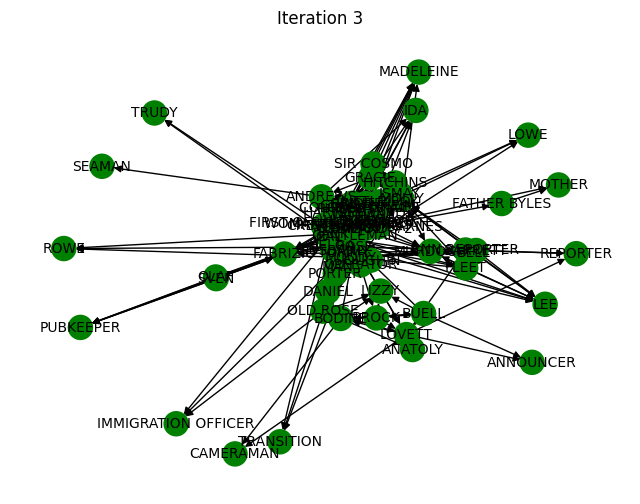

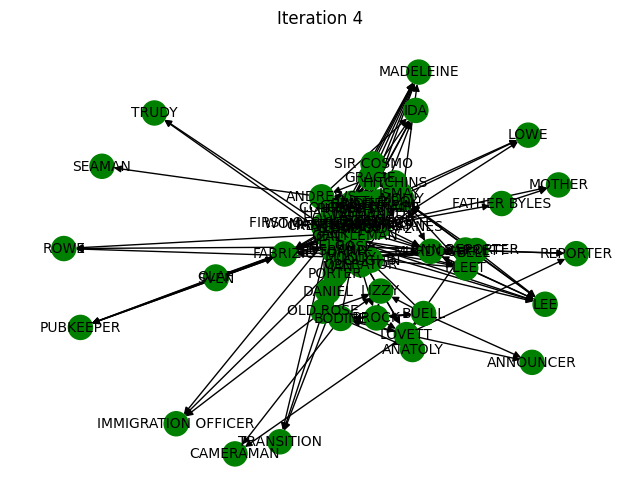

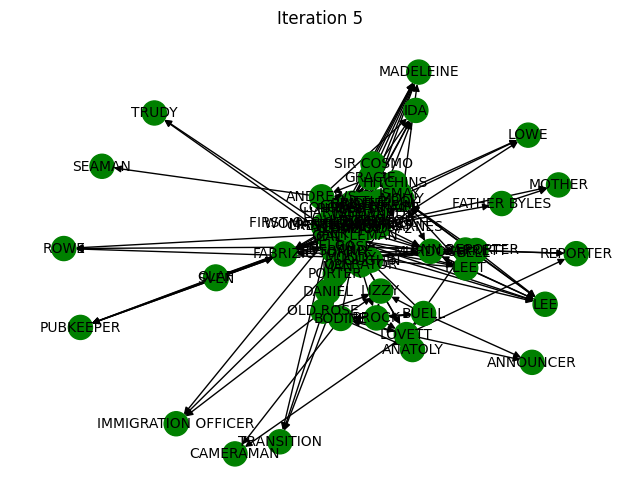

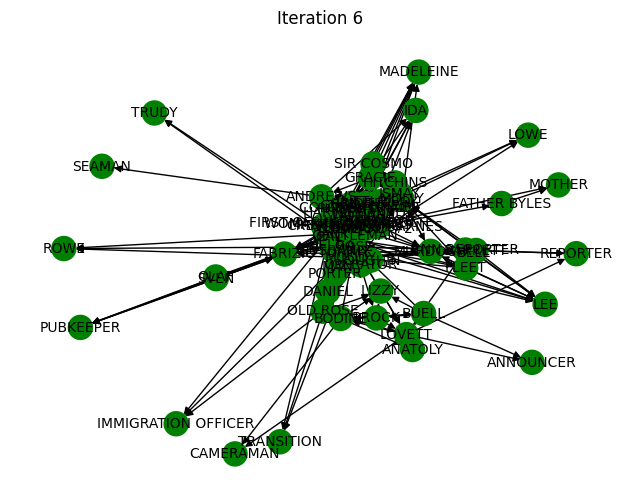

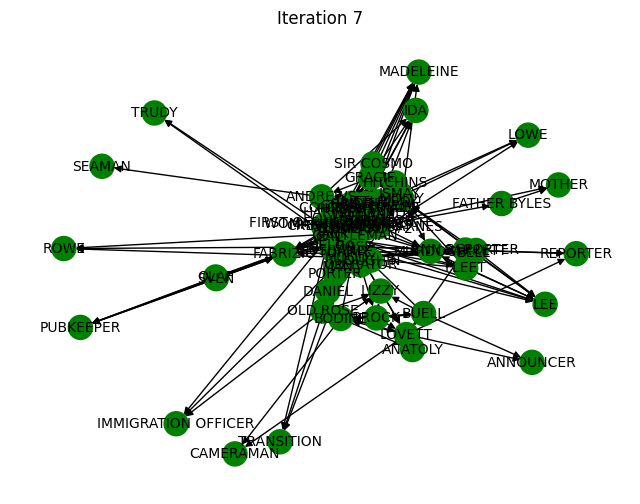

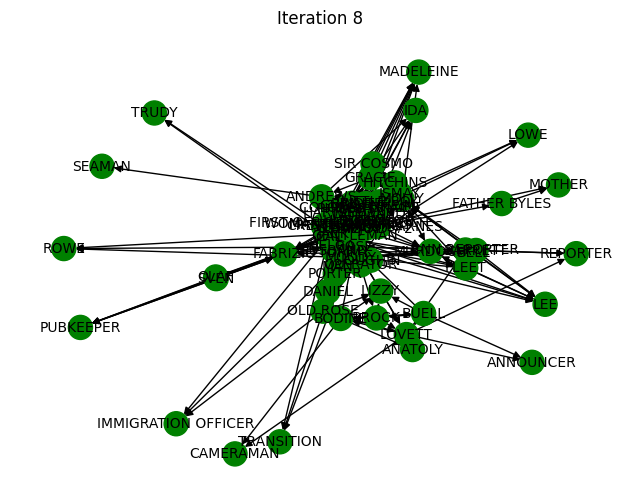

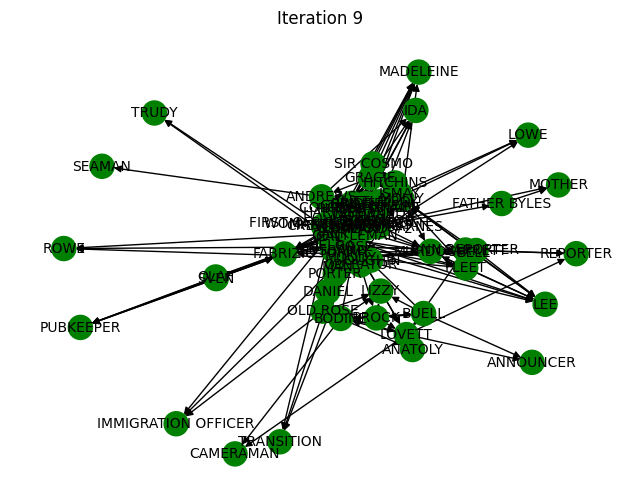

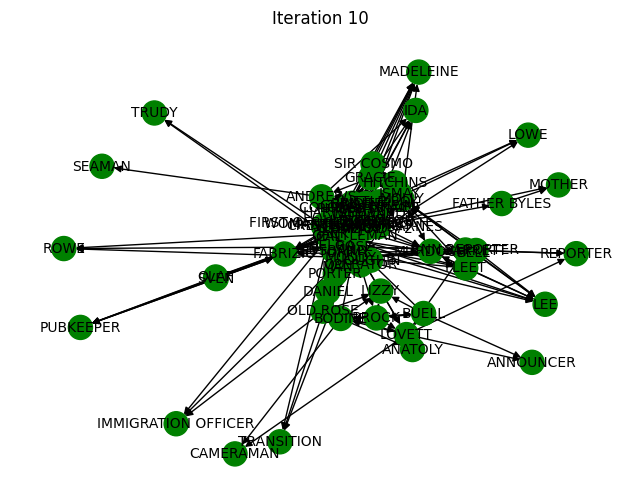

In [12]:

# Read nodes from the CSV file
G = nx.DiGraph()
with open('../Graph/nodes.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_node(row['Id'], label=row['Label'])

# Read edges from the CSV file
with open('../Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight']))


#Innovation Adaptaion Model: Bass Contagion model to model the spread of innovation (how characters change their opinion during the movie and how they are influenced by each other)
#The model is based on the Bass diffusion model, which is a model that describes the adoption of a new behaviour in our case, where the adoption is a function of time.
def initialize_node_states(G):
    nx.set_node_attributes(G, {node: {'adopted': False} for node in G.nodes}, 'adopted')

def bass_contagion_model(G, s, q, num_iterations):
    adoption_history = []  # Store node states at each iteration
    for iteration in range(num_iterations):
        adoption_probabilities = {}
        for node in G.nodes():
            if not G.nodes[node]['adopted']:
                # Calculate probability of adoption
                external_influence = s
                neighbor_influence = sum([1 for neighbor in G.neighbors(node) if G.nodes[neighbor]['adopted']]) * q
                adoption_probability = 1 - (1 - external_influence) * (1 - neighbor_influence)
                adoption_probabilities[node] = adoption_probability

        # Update states at the end of the iteration
        for node, probability in adoption_probabilities.items():
            if random.random() < probability:
                G.nodes[node]['adopted'] = True

        # Record the state for this iteration
        current_adopted_states = {node: G.nodes[node]['adopted'] for node in G.nodes}
        adoption_history.append(current_adopted_states)

    return adoption_history


# Visualize the evolution of the model over time by plotting a graph for each iteration
def visualize_evolution(graph, adoption_history):
    pos = nx.spring_layout(graph)

    for iteration, adopted_states in enumerate(adoption_history):
        plt.figure(figsize=(8, 6))
        plt.title(f'Iteration {iteration + 1}')
        nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)
        nx.draw(graph, pos, node_color=['green' if adopted_states[node] else 'red' for node in graph.nodes()])
        plt.show()


# Set model parameters
s = 0.1
q = 0.5
num_iterations = 10

# Initialize node states
initialize_node_states(G)

# Run the simulation
bass_contagion_model(G, s, q, num_iterations)
adoption_history = bass_contagion_model(G, s, q, num_iterations)

# Visualize the evolution
visualize_evolution(G, adoption_history)


## Remake

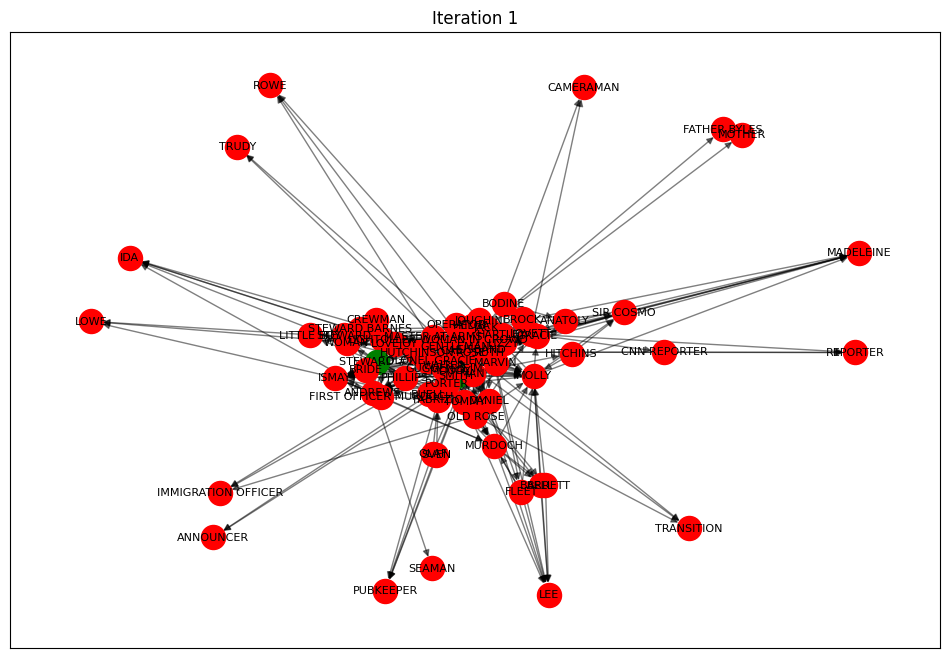

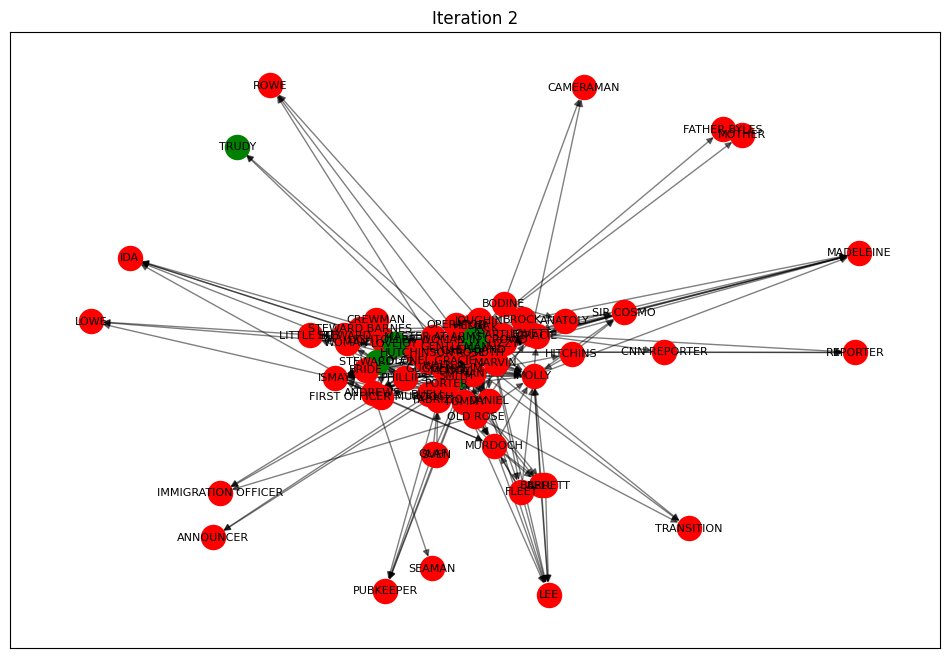

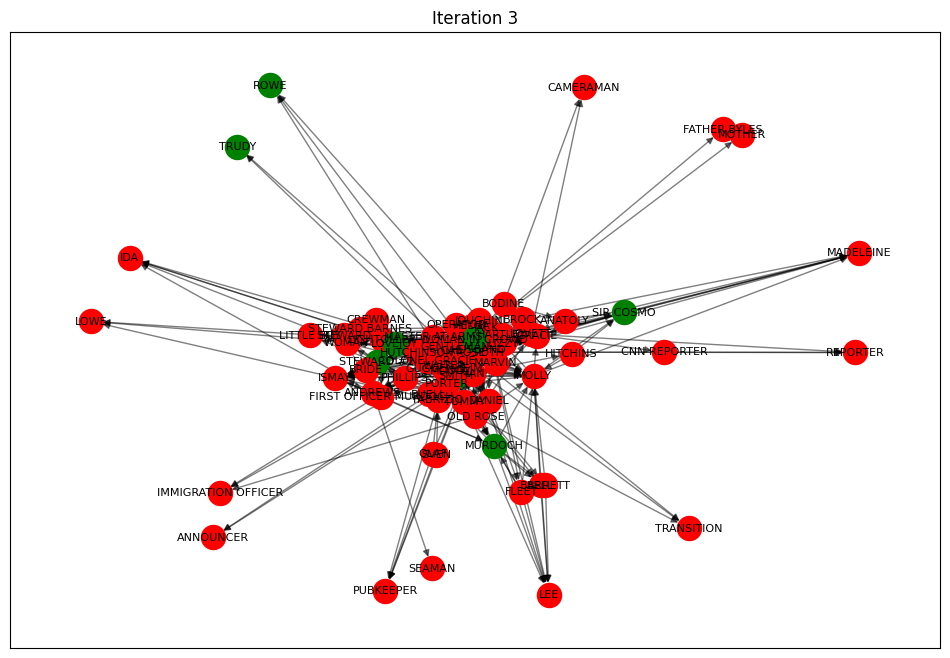

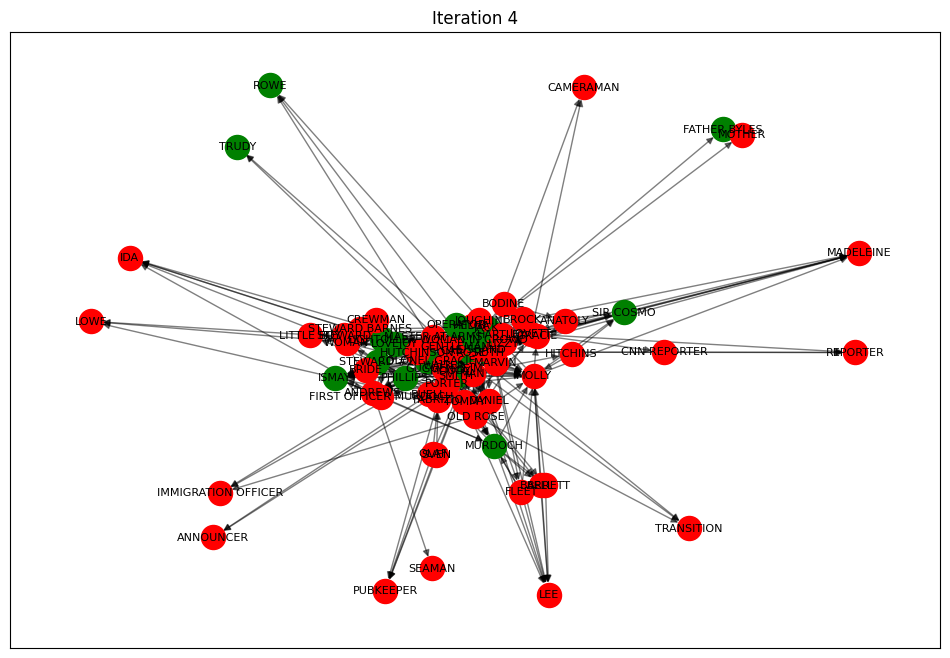

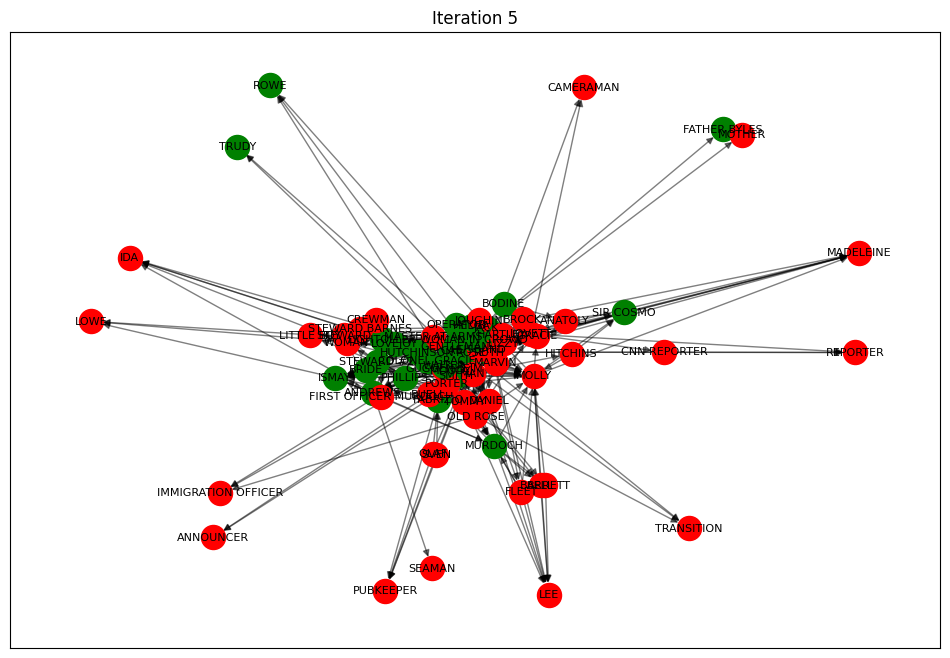

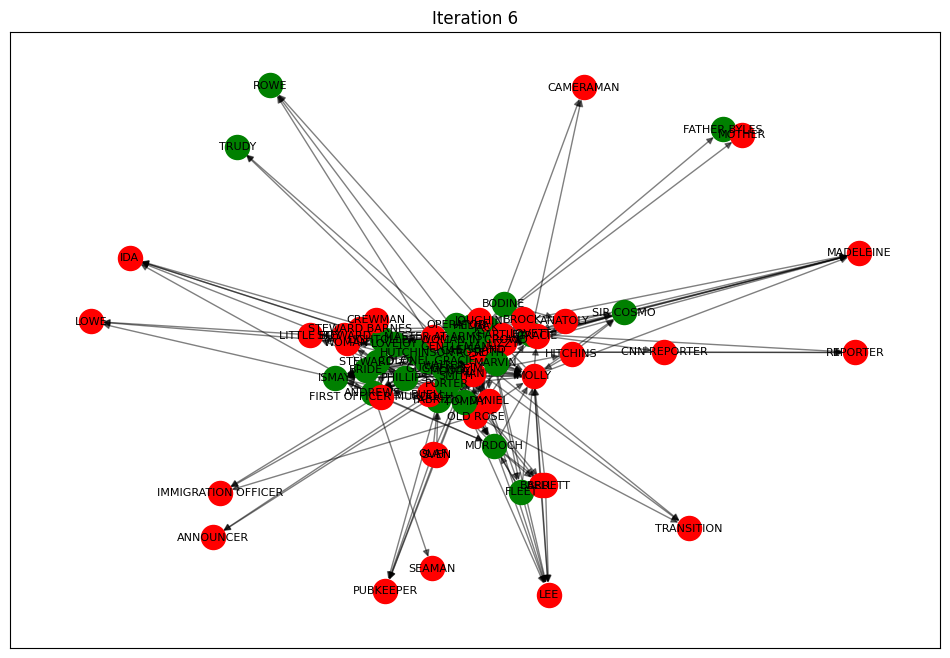

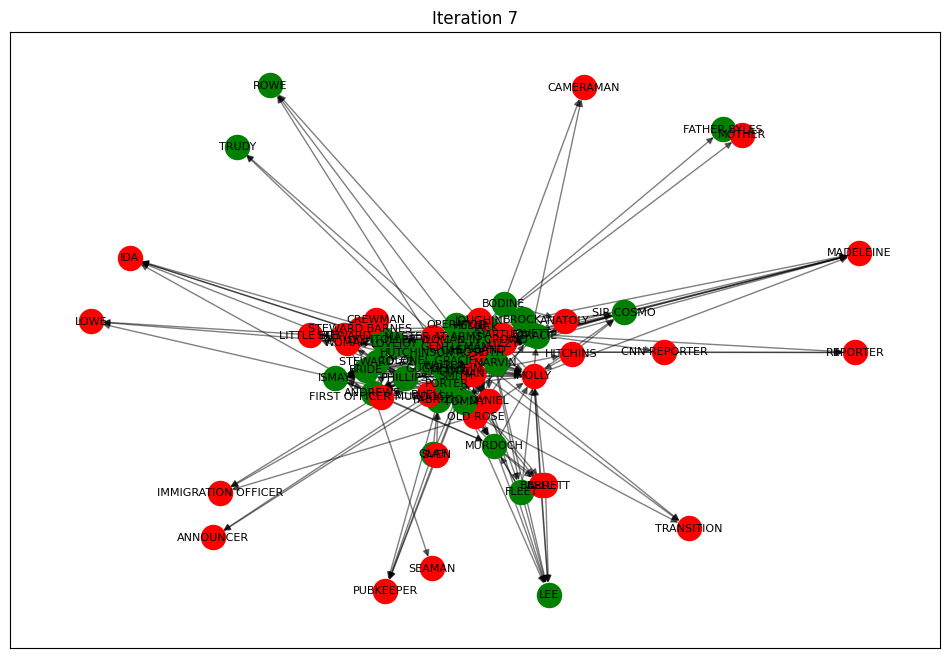

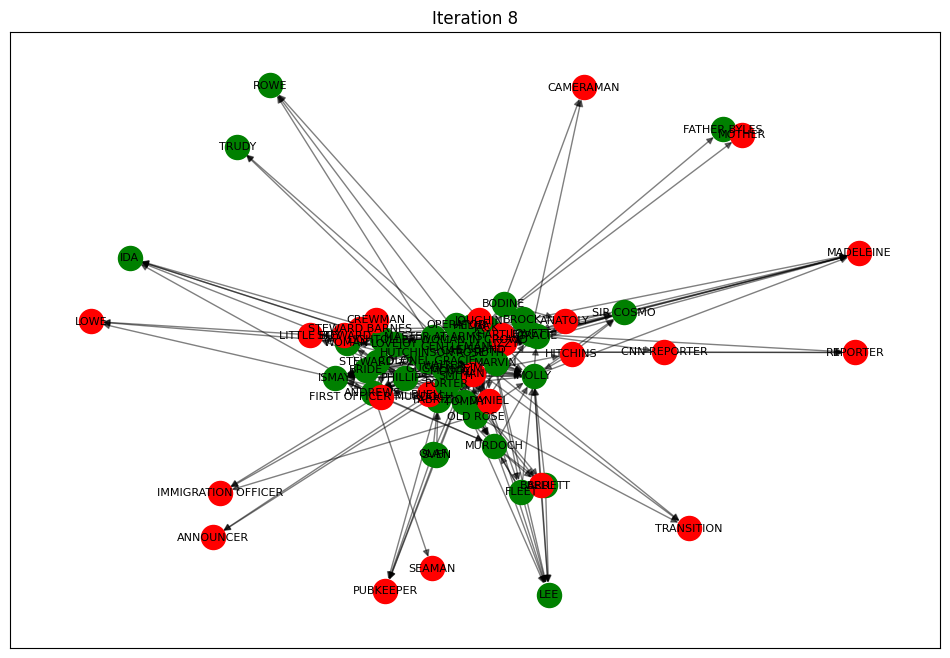

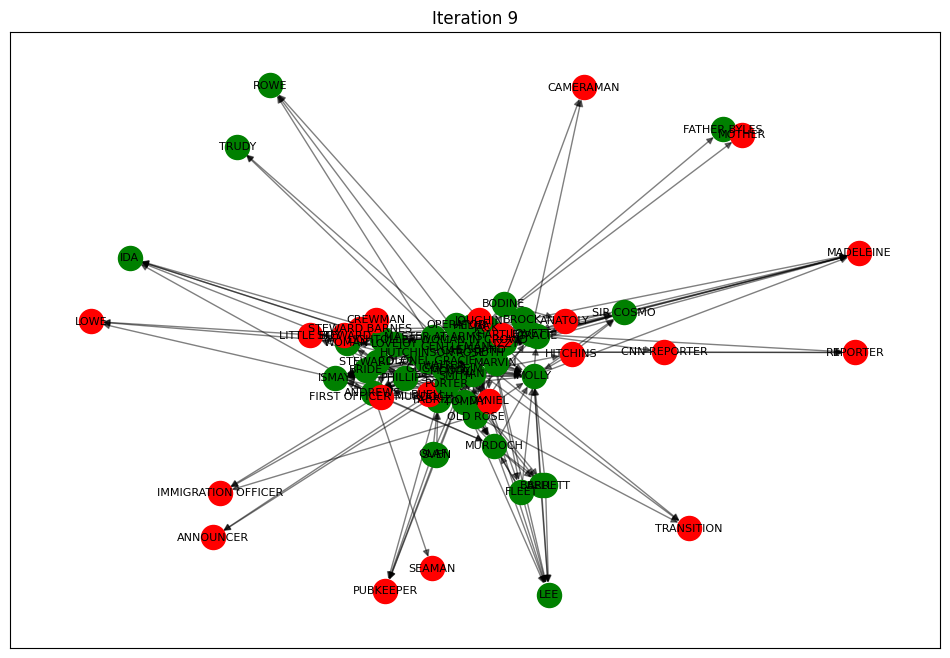

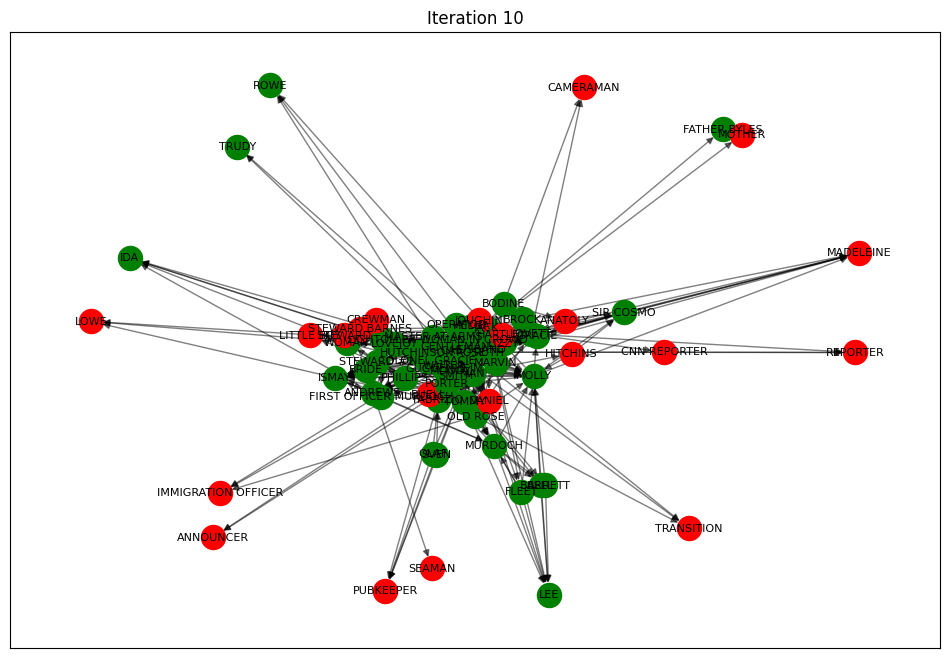

In [15]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Initialize the graph from CSV files
def initialize_graph():
    G = nx.DiGraph()
    # Replace with the actual paths to your CSV files
    with open('../Graph/nodes.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open('../Graph/edges.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=int(row['Weight']))
    return G

# Initialize node states
def initialize_node_states(G, initial_adopted_nodes):
    for node in G.nodes:
        G.nodes[node]['adopted'] = node in initial_adopted_nodes

# Bass contagion model
def bass_contagion_model(G, s, q, num_iterations):
    adoption_history = []
    for _ in range(num_iterations):
        adoption_changes = {}
        for node in G.nodes:
            if not G.nodes[node]['adopted']:
                external_influence = s
                neighbor_influence = sum(G.nodes[neighbor]['adopted'] for neighbor in G.neighbors(node)) * q
                adoption_probability = 1 - (1 - external_influence) * (1 - neighbor_influence)
                adoption_changes[node] = random.random() < adoption_probability

        # Update node states based on calculated changes
        for node, will_adopt in adoption_changes.items():
            if will_adopt:
                G.nodes[node]['adopted'] = True

        # Record current state
        current_state = {node: G.nodes[node]['adopted'] for node in G.nodes}
        adoption_history.append(current_state)

    return adoption_history

# Visualization function
def visualize_evolution(G, adoption_history):
    pos = nx.spring_layout(G)  # Improved layout
    labels = nx.get_node_attributes(G, 'label')  # Ensure labels are correctly set from CSV

    for iteration, state in enumerate(adoption_history):
        plt.figure(figsize=(12, 8))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        
        for node, adopted in state.items():
            node_color = 'green' if adopted else 'red'
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color)
            nx.draw_networkx_labels(G, pos, labels={node: labels[node]}, font_size=8)

        plt.title(f'Iteration {iteration + 1}')
        plt.show()

# Main execution
G = initialize_graph()
initial_adopted_nodes = ['Rose', 'Jack']  # Starting with Rose and Jack as adopted, for example
initialize_node_states(G, initial_adopted_nodes)
s = 0.05  # External influence
q = 0.1   # Neighbor influence
num_iterations = 10

adoption_history = bass_contagion_model(G, s, q, num_iterations)
visualize_evolution(G, adoption_history)
